1. IMPORT ALL NECESSARY LIBRARIES

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import torch
from ultralytics import YOLO
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

2. MAKE YOLO DATASET FOR LICENSE PLATE DETECTION

In [2]:
csv_path = r'F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\Licplatesdetection_train.csv'
img_dir = r'F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\license_plates_detection_train'
base_dir = r'F:\YOLO_LicensePlate_Dataset'  # output dir

for split in ['train', 'val']:
    os.makedirs(os.path.join(base_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'labels', split), exist_ok=True)

df = pd.read_csv(csv_path)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def process_split(split_df, split_name):
    for _, row in split_df.iterrows():
        img_name = row['img_id']
        img_path = os.path.join(img_dir, img_name)
        
        try:
            img = Image.open(img_path)
            w, h = img.size
        except Exception as e:
            print(f"Error loading {img_name}: {e}")
            continue

        # YOLO format: class x_center y_center width height (all normalized)
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        x_center = (xmin + xmax) / 2 / w
        y_center = (ymin + ymax) / 2 / h
        width = (xmax - xmin) / w
        height = (ymax - ymin) / h

        dest_img_path = os.path.join(base_dir, 'images', split_name, img_name)
        shutil.copy(img_path, dest_img_path)

        label_name = img_name.replace('.jpg', '.txt')
        label_path = os.path.join(base_dir, 'labels', split_name, label_name)

        with open(label_path, 'w') as f:
            f.write(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

process_split(train_df, 'train')
process_split(val_df, 'val')

yaml_path = os.path.join(base_dir, 'license_plate.yaml')
with open(yaml_path, 'w') as f:
    f.write(f"""path: {base_dir}
train: images/train
val: images/val
nc: 1
names: ['plate']
""")

print(f"Dataset prepared in {base_dir} with train and val splits.")

Dataset prepared in F:\YOLO_LicensePlate_Dataset with train and val splits.


3. TRAIN YOLO ON THE CUSTOE DATASET USING THE COMMAND

In [ ]:
# ! yolo detect train data="F:\YOLO_LicensePlate_Dataset\license_plate.yaml" model=yolov8l.pt epochs=50 imgsz=640 batch=16
# STARTS TRAINING YOLOv8l after de-commenting the above line


4. TEST THE TRAINED LICENSE DETECTION MODEL


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1000.jpg: 448x640 1 plate, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1001.jpg: 640x384 1 plate, 13.9ms
Speed: 2.3ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1002.jpg: 640x480 1 plate, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1003.jpg: 384x640 1 plate, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1004.jpg: 640x384 1 plate, 12.3ms
Speed: 1.9ms prep

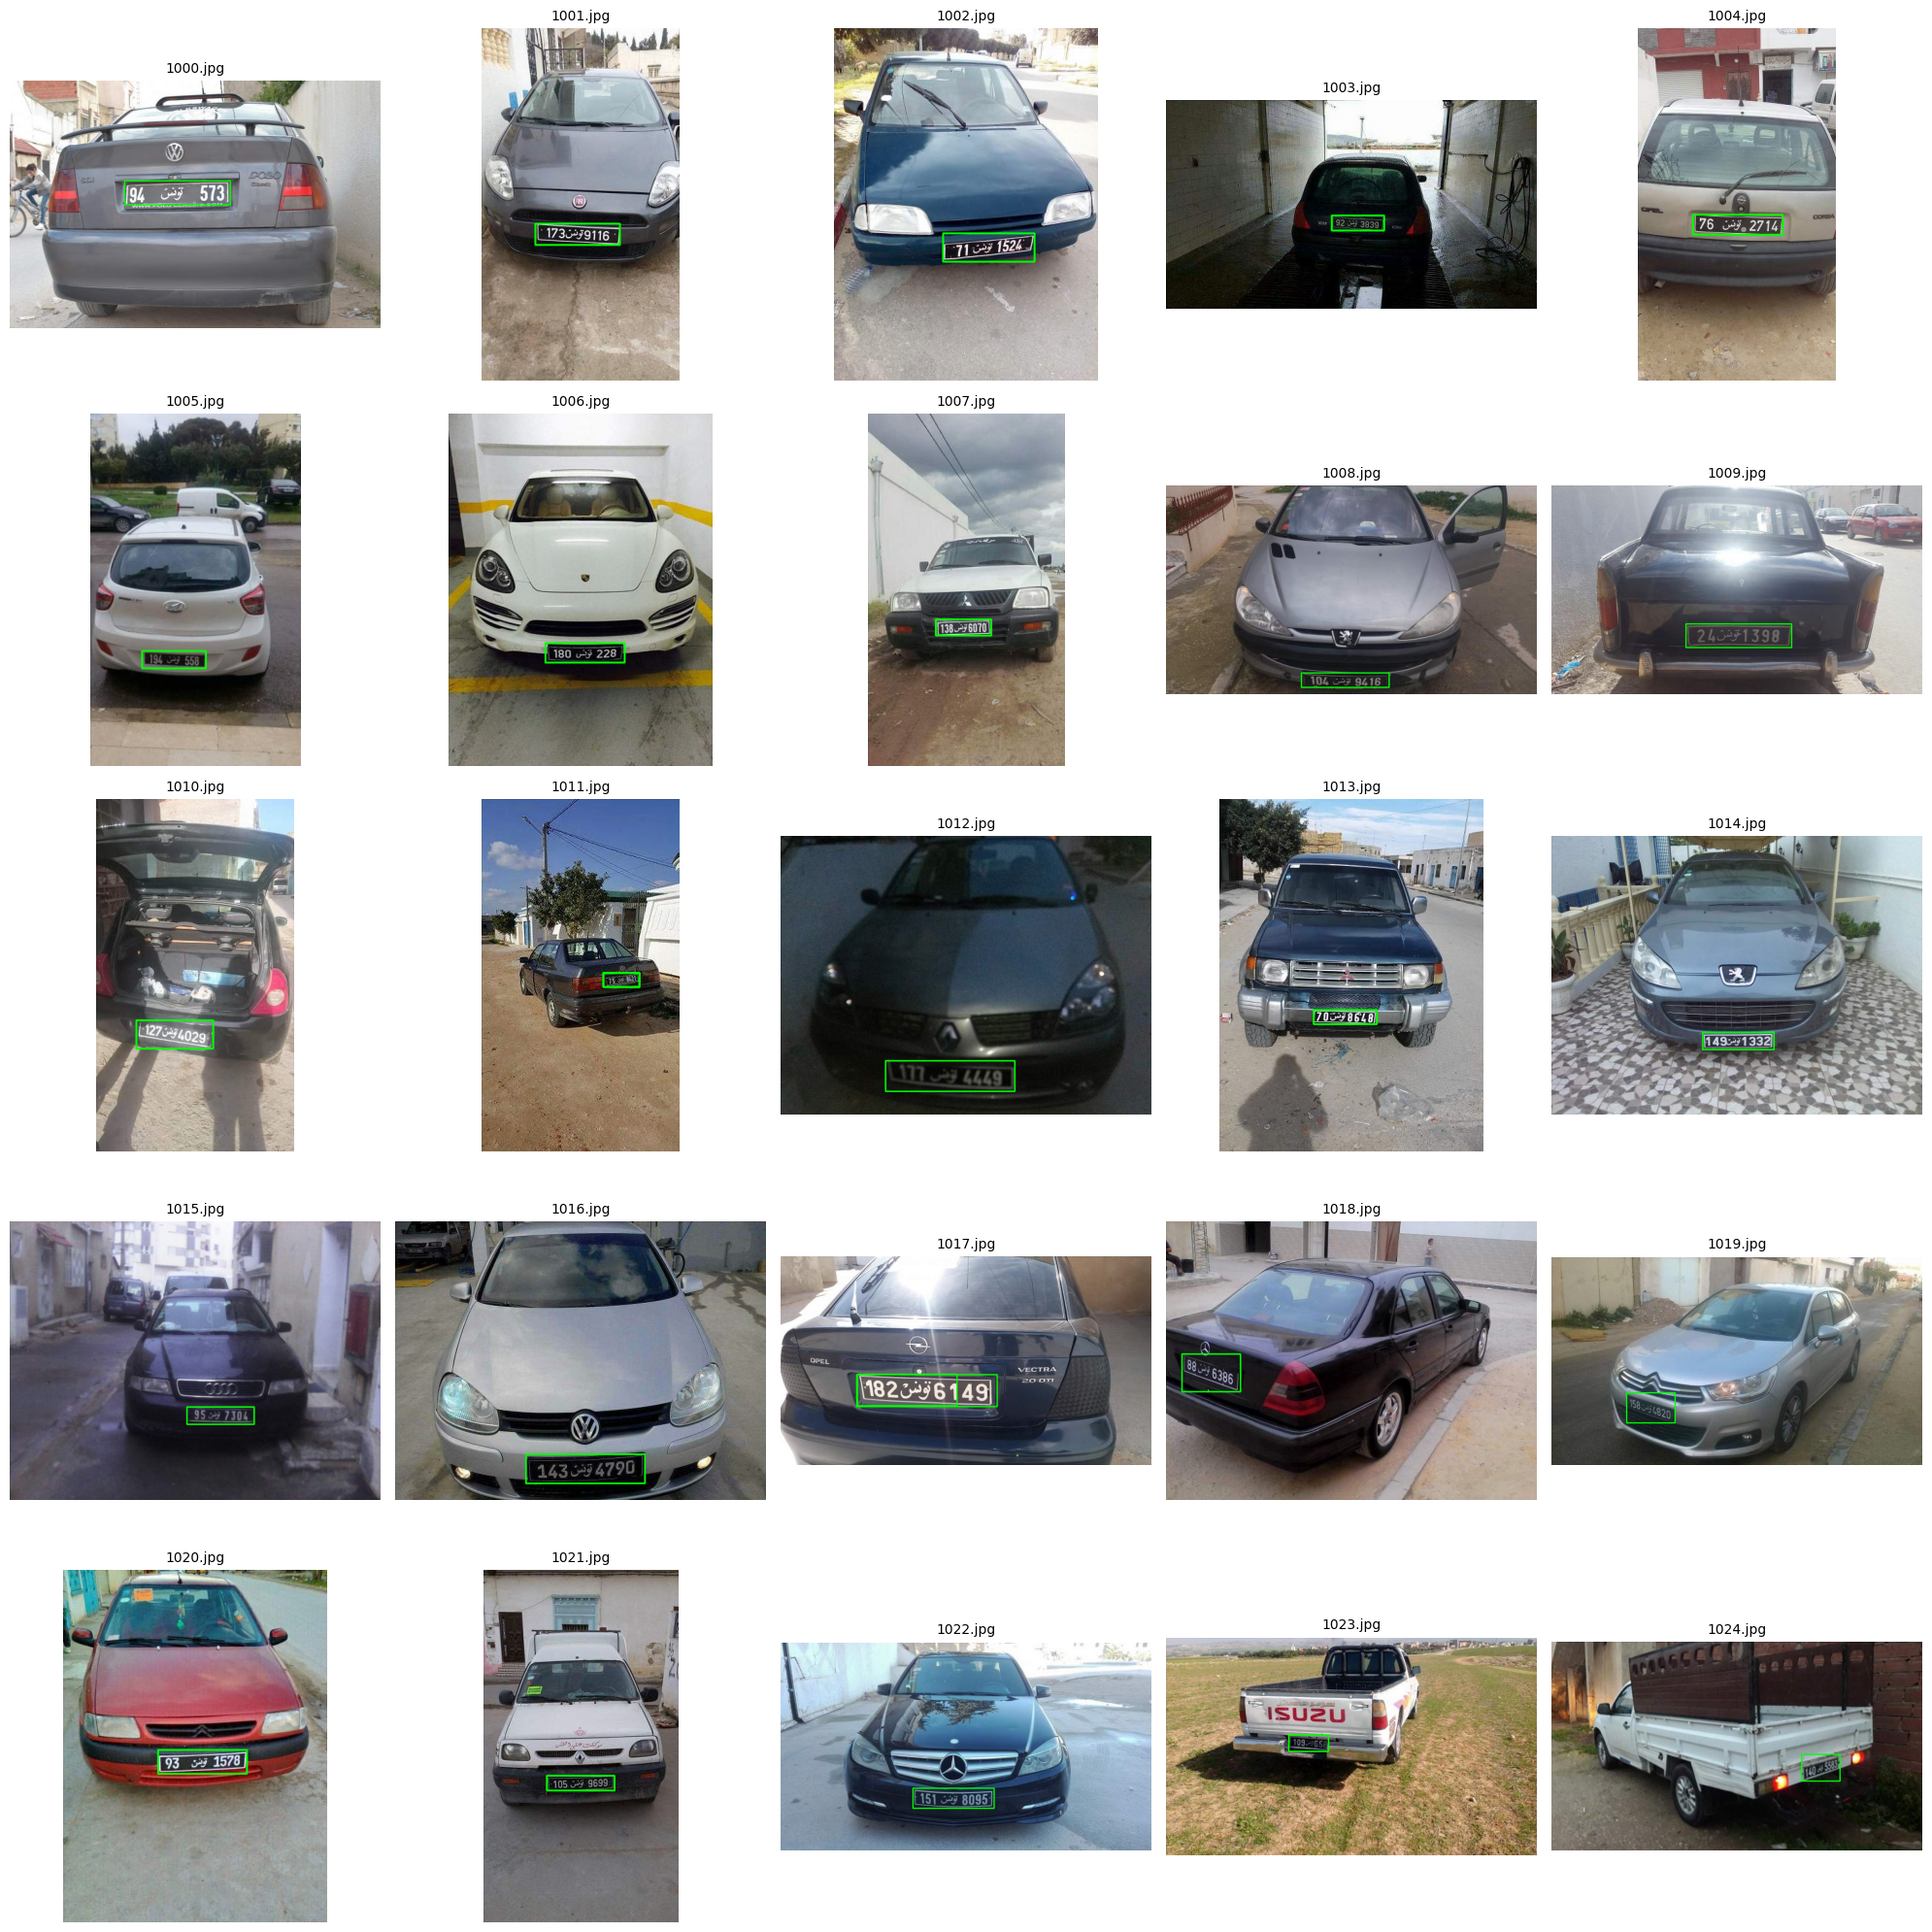

In [6]:
import cv2
import math

MODEL_PATH = "best.pt"
IMAGE_DIR = r"F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test"
GRID_ROWS = 5
GRID_COLS = 5

model = YOLO(MODEL_PATH)

image_files = [f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = [os.path.join(IMAGE_DIR, f) for f in image_files]

processed_images = []

for img_path in image_paths[:26]:
    img = cv2.imread(img_path)
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model(img_path)[0]

    # Draw boxes if any
    if results.boxes:
        for box in results.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

    processed_images.append((img_rgb, os.path.basename(img_path)))

# === Plot in grid ===
def plot_images(images, rows, cols):
    total = 25
    pages = math.ceil(total / (rows * cols))

    for p in range(pages):
        start = p * rows * cols
        end = min(start + rows * cols, total)
        subset = images[start:end]

        fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
        axs = axs.flatten()

        for i in range(rows * cols):
            if i < len(subset):
                axs[i].imshow(subset[i][0])
                axs[i].set_title(subset[i][1], fontsize=10)
            axs[i].axis('off')

        plt.tight_layout()
        plt.show()

plot_images(processed_images, GRID_ROWS, GRID_COLS)

5. IMPLEMENT THE WHOLE PIPLINE


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1000.jpg: 448x640 1 plate, 10.5ms
Speed: 2.4ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


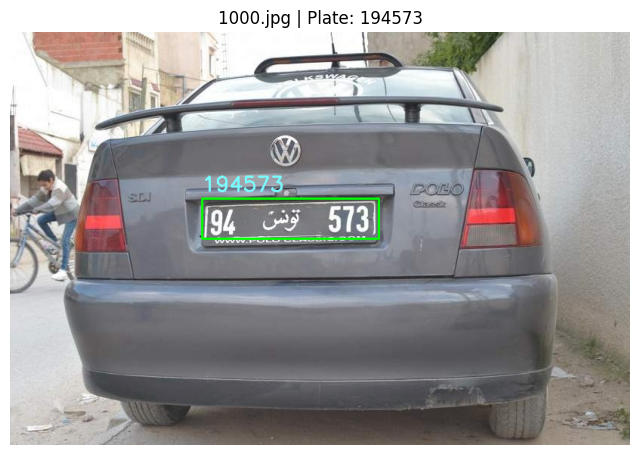


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1001.jpg: 640x384 1 plate, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)


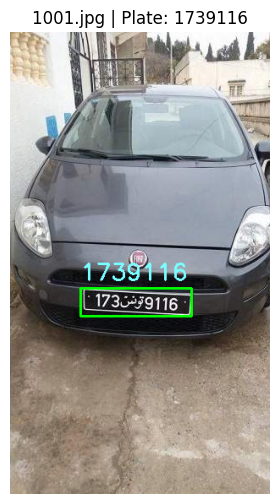


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1002.jpg: 640x480 1 plate, 8.2ms
Speed: 4.2ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


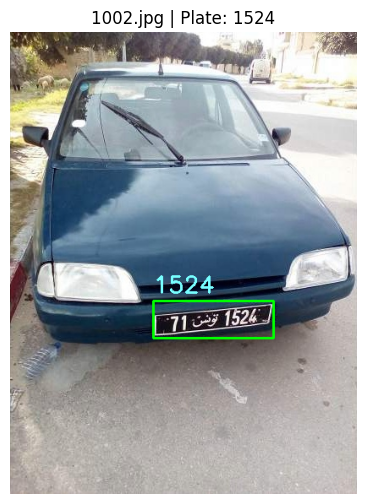


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1003.jpg: 384x640 1 plate, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


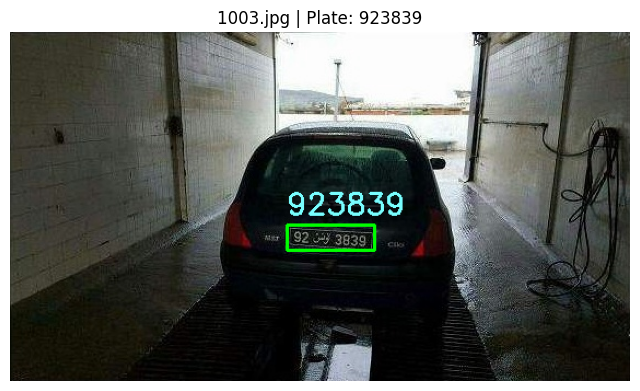


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1004.jpg: 640x384 1 plate, 13.6ms
Speed: 2.4ms preprocess, 13.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)


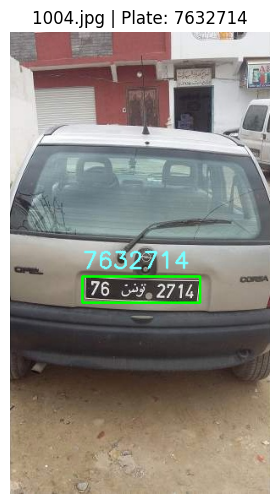


image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1005.jpg: 640x384 1 plate, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1006.jpg: 640x480 1 plate, 8.0ms
Speed: 3.6ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1007.jpg: 640x384 1 plate, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1008.jpg: 384x640 1 plate, 7.1ms
Speed: 1.7ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test\1009.jpg: 384x640 1 plate, 6.7ms
Speed: 1.8ms preprocess,

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr
import re

# --- Paths ---
model_path = "best.pt"
image_dir = r"F:\License-Plate-Detection-and-Recognition\DATA SCIENTIST_ASSIGNMENT\test"
results_dir = "annotated_results"
os.makedirs(results_dir, exist_ok=True)

# --- Load YOLOv8 model ---
model = YOLO(model_path)

# --- Initialize EasyOCR ---
reader = easyocr.Reader(['en'], gpu=True)

# --- Get all image paths ---
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_paths = [os.path.join(image_dir, f) for f in image_files]

# --- Process images ---
display_count = 0
max_display = 5

for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is None:
        continue

    results = model(img_path)[0]

    if results.boxes:
        for box in results.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cropped = img[y1:y2, x1:x2]

            detections = reader.readtext(cropped, detail=0, min_size=6)
            raw_text = ''.join(detections)
            raw_text = re.sub(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]', '', raw_text)
            digits_only = ''.join(filter(str.isdigit, raw_text))

            # Limit to 7 digits: max 3 from start and 4 from end
            if len(digits_only) > 7:
                digits_only = digits_only[:3] + digits_only[-4:]

            # Draw bounding box and text
            annotated_img = img.copy()
            cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_img, digits_only, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 254, 120), 2)

            # Save annotated image
            out_path = os.path.join(results_dir, os.path.basename(img_path))
            cv2.imwrite(out_path, annotated_img)

            # Show 4-5 samples only
            if display_count < max_display:
                plt.figure(figsize=(8, 6))
                plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.title(f"{os.path.basename(img_path)} | Plate: {digits_only}")
                plt.show()
                display_count += 1

            break  # Only the first box is processed per image

print(f"\nAll annotated results saved to: {results_dir}")
